In [1]:
import numpy as np
import pandas as pd
import os
#from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles
from matplotlib_venn import venn3

# graficos embebidos
%matplotlib inline

In [2]:
try:
    # Change the current working Directory to the quantification dir
    os.chdir("/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/")
    print("Directory changed")
except OSError:
    print("Can't change the Current Working Directory")
s_path=os.getcwd()
print(s_path)

Directory changed
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data


#### require mathplot_venn library
pip3 install matplotlib_venn <br>
matplotlib-venn-0.11.5
<br>
**Los conjuntos eliminan los elementos duplicados**

### Subset 1: Control
**Crea la lista de genes en ceros del conjunto de datos de control "Dataset1"**

In [3]:
file="healthy_geneIDs_with_zeros.csv"   #all_infected_geneIDs_with_zeros.csv
df= pd.read_csv(file, sep='\t', header=None)

In [4]:
print(df.shape)
print(df.columns)
set1_ctrl=df[0].drop_duplicates().to_list()
len(set1_ctrl)

(5228, 1)
Int64Index([0], dtype='int64')


5228

### Subset 2: Tratamientos
**Crea la lista de genes en ceros del conjunto de datos de tratamientos "Dataset2"**

In [5]:
file="infected_geneIDs_with_zeros.csv"
df= pd.read_csv(file, sep='\t', header=None)

In [6]:
print(df.shape)
print(df.columns)
set2_infect=df[0].drop_duplicates().to_list()
len(set2_infect)

(3415, 1)
Int64Index([0], dtype='int64')


3415

### Universal Set: based on CDS of the Araport11 annotation
**Ahora. Crea el conjunto universal. <br>
Lista de genes codificantes a proteinas en la anotación Araport11.**

In [7]:
file='../meta-data/ID_samples.csv'
df= pd.read_csv(file, sep='\t', header=None)
print(df.shape)
print(df.columns)
set_universal=df[0].drop_duplicates().to_list()
len(set_universal)

(26, 1)
Int64Index([0], dtype='int64')


26

### Comparación de los genes apagados en los dos subconjuntos principales

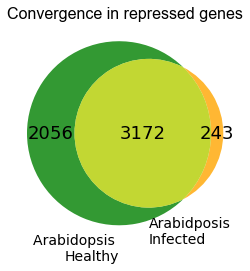

In [9]:
axis_font = {'fontname':'Arial', 'size':'16'}

diagram=venn2([set(set1_ctrl), set(set2_infect)], 
              set_labels = ('Arabidopsis \nHealthy', 'Arabidposis\nInfected'),
              set_colors=('green', 'orange'), alpha = 0.8)

plt.title("Convergence in repressed genes", **axis_font)

for t in diagram.set_labels: t.set_fontsize(14)
for t in diagram.subset_labels: t.set_fontsize(18)

plt.show()

### Compración de los genes apagados en los dos subconjuntos principales con respecto al conjunto universal

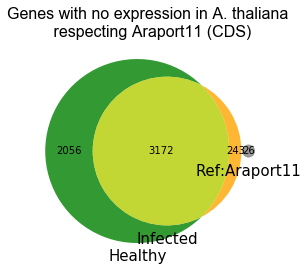

In [13]:
axis_font = {'fontname':'Arial', 'size':'16'}

diagram=venn3([set(set1_ctrl), set(set2_infect), set(set_universal)], 
             set_labels = ('Healthy', 'Infected', 'Ref:Araport11'),
             set_colors=('green', 'orange','grey'), alpha = 0.8)

for t in diagram.set_labels: t.set_fontsize(15)
#for t in diagram.subset_labels: t.set_fontsize(16)

plt.title("Genes with no expression in A. thaliana \n respecting Araport11 (CDS)", **axis_font)
plt.show()

El argumento indica el tamaño relativo de los tres subconjuntos en este orden: Ab (izquierda), aB (derecha), AB (intersección). Así, la tupla (1, 2, 1) dibujaría el conjunto B del doble de tamaño respecto de A.<br>
Para identificar a cada uno de los subconjuntos (tres en diagramas de dos conjuntos) el módulo utiliza una nomenclatura que consiste en colocar un 1 para indicar que la sección está incluida en el conjunto y un 0 para indicar que está excluida. De esta manera. Siguiendo el orden «ABC», el subconjunto 10 es el de la izquierda (el que pertenece a A pero no a B); el 01, el de la derecha (el que pertenece a B pero no a A); y el 11, el del medio (la intersección).

### Operaciones lógicas 

In [14]:
# Cardinalidad de un conjunto con len().
### print("La cardinalidad del conjunto A.thaliana sana = {0} es {1}".format(set1_ctrl,len(set1_ctrl)))  
print("La cardinalidad del conjunto A.thaliana sana es {0}".format(len(set1_ctrl)))  
print("La cardinalidad del conjunto A.thaliana infectada es {0}".format(len(set2_infect)))  

La cardinalidad del conjunto A.thaliana sana es 5228
La cardinalidad del conjunto A.thaliana infectada es 3415


In [15]:
# To logical operations data need to be as set dtype
set1_ctrl = set(set1_ctrl)
# set1_ctrl
set2_infect = set(set2_infect)

In [16]:
# Igualdad
set1_ctrl == set2_infect

False

In [17]:
# Subconjunto
# ¿estan los genes del conjunto de infectadas en el conjunto de control?
set2_infect.issubset(set1_ctrl)

False

In [18]:
## Subconjunto propio
# set2_infect != set1_ctrl
set2_infect.issubset(set1_ctrl) and set2_infect != set1_ctrl
#               FALSE AND TRUE

False

In [19]:
union=set2_infect.union(set1_ctrl)
len(union)

5471

In [20]:
# Intersección de conjuntos
intersec=set2_infect.intersection(set1_ctrl)
lst_intersec=list(intersec)
print(lst_intersec)
len(lst_intersec)

['AT2G07673', 'AT5G60810', 'AT5G43000', 'AT1G34520', 'AT3G05860', 'AT5G44960', 'AT5G55565', 'AT4G22115', 'AT5G46930', 'AT4G35375', 'AT1G52495', 'AT2G31850', 'AT5G28820', 'AT2G07617', 'AT1G63190', 'AT1G55720', 'AT3G23165', 'AT2G15345', 'AT4G24980', 'AT1G48285', 'AT5G09490', 'AT3G53330', 'AT3G01326', 'AT1G59680', 'ATMG01230', 'AT4G04775', 'AT5G53720', 'AT2G25409', 'AT2G02525', 'AT3G25719', 'AT1G53282', 'AT2G16019', 'AT1G14940', 'AT2G05786', 'AT3G28853', 'AT5G54215', 'AT3G42130', 'AT5G36661', 'AT2G14390', 'AT1G24256', 'AT2G20463', 'AT3G01327', 'AT2G06904', 'AT5G52610', 'AT2G04137', 'AT4G26880', 'ATMG00050', 'AT2G04621', 'AT4G25845', 'AT1G29580', 'AT5G54043', 'AT2G04063', 'AT2G34110', 'AT2G02280', 'AT5G30360', 'AT5G38435', 'AT5G22960', 'AT1G33820', 'AT5G54067', 'AT3G44930', 'AT1G15757', 'AT5G48905', 'AT1G05615', 'AT3G22125', 'AT3G10439', 'AT5G58830', 'AT2G07705', 'AT1G52060', 'AT1G45403', 'AT3G29110', 'AT4G03625', 'AT3G52080', 'AT3G32960', 'AT1G26515', 'AT5G25425', 'AT1G47300', 'AT3G43880'

3172

In [27]:
# Diferencia entre conjuntos
dif_ctrl=set1_ctrl - set2_infect
print(len(dif_ctrl))
lst_only_healthy=list(dif_ctrl)

2056


In [31]:
## Save the gene IDs with ceros in a file 
with open("healthy_exclusive_repressed_genes.csv", "w") as outfile:
    outfile.write("\n".join(str(item) for item in lst_only_healthy))

In [29]:
dif_inf= set2_infect-set1_ctrl
lst_only_infect=list(dif_inf)
print(lst_only_infect)
len(dif_inf)

['AT1G74675', 'AT2G11778', 'AT5G41660', 'AT2G34320', 'AT3G23470', 'AT2G04037', 'AT3G62440', 'AT4G04580', 'AT3G24310', 'AT5G35890', 'AT3G47170', 'AT5G06630', 'AT2G24950', 'AT1G26976', 'AT1G07645', 'AT2G31550', 'AT1G08005', 'AT3G60990', 'AT2G31862', 'AT1G02490', 'AT5G06010', 'AT5G35380', 'AT1G79100', 'AT1G18050', 'AT5G35950', 'AT2G46850', 'AT4G32090', 'AT3G61290', 'AT5G43640', 'AT3G62680', 'AT1G54760', 'AT2G18640', 'AT3G24220', 'AT1G22290', 'AT2G03823', 'AT5G14340', 'AT5G41570', 'AT5G59270', 'AT2G10553', 'AT4G27110', 'AT1G44478', 'AT2G14830', 'AT2G05060', 'AT5G67265', 'AT2G23210', 'AT2G07190', 'AT4G00080', 'AT3G25930', 'AT5G35770', 'AT1G72110', 'AT1G09720', 'AT4G13440', 'AT1G10455', 'AT1G57780', 'AT3G18957', 'AT5G50630', 'AT1G53610', 'AT2G22145', 'AT2G05720', 'AT4G23070', 'AT1G33900', 'AT4G17505', 'AT5G14990', 'AT1G54475', 'AT4G08875', 'AT1G28327', 'AT2G22440', 'AT4G03156', 'AT4G28850', 'AT1G11655', 'AT3G12240', 'AT5G18870', 'AT1G48730', 'AT1G52940', 'AT5G40360', 'AT4G16024', 'AT2G07644'

243

In [32]:
## Save the gene IDs with ceros in a file 
with open("infected_exclusive_repressed_genes.csv", "w") as outfile:
    outfile.write("\n".join(str(item) for item in lst_only_infect))

## Hasta aqui para la tesis

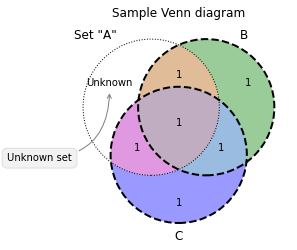

In [39]:

from matplotlib_venn import venn3, venn3_circles
plt.figure(figsize=(4,4))
v = venn3(subsets=(1, 1, 1, 1, 1, 1, 1), set_labels = ('A', 'B', 'C'))
v.get_patch_by_id('100').set_alpha(1.0)
v.get_patch_by_id('100').set_color('white')
v.get_label_by_id('100').set_text('Unknown')
v.get_label_by_id('A').set_text('Set "A"')
c = venn3_circles(subsets=(1, 1, 1, 1, 1, 1, 1), linestyle='dashed')
c[0].set_lw(1.0)
c[0].set_ls('dotted')
plt.title("Sample Venn diagram")
plt.annotate('Unknown set', xy=v.get_label_by_id('100').get_position() - np.array([0, 0.05]), xytext=(-70,-70),
             ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray'))
plt.show()

Resources: <br>
https://pypi.org/project/matplotlib-venn/  <br>
https://recursospython.com/guias-y-manuales/diagramas-de-venn-con-matplotlib/  <br>
https://relopezbriega.github.io/blog/2015/10/11/conjuntos-con-python/ <br>   

### Un poco de analisis de los genes consultado en TAIR y PANTHER DB

In [185]:
file="results-data/gene_ID_response_stress_pantherGeneList.txt"
df_pantherDB_stress= pd.read_csv(file, sep='\t', header=None)

df.df_pantherDB_stress = [1, 2, 3,4,5,6]
df_pantherDB_stress.columns = ['locus', 'gene', 'family','subfamily','e','f']

df_pantherDB_stress

,locus,gene,family,subfamily,e,f
0,ARATH|TAIR=locus=1006230139|UniProtKB=F4IHC3,AT2G05635,DNA repair DEAD helicase RAD3/XP-D subfamily p...,FANCONI ANEMIA GROUP J PROTEIN (PTHR11472:SF47),DNA helicase(PC00011),Arabidopsis thaliana
1,ARATH|TAIR=locus=2081730|UniProtKB=Q9LZJ7,AT3G62680,Proline-rich protein 3;PRP3;ortholog,PROLINE-RICH PROTEIN 1-RELATED (PTHR33470:SF25),NaN,Arabidopsis thaliana
2,ARATH|TAIR=locus=2010207|UniProtKB=F4I1P7,AT1G49250,DNA ligase;At1g49250;ortholog,DNA LIGASE 1 (PTHR45674:SF4),DNA ligase(PC00012),Arabidopsis thaliana
3,ARATH|Gene_OrderedLocusName=At5g59270|UniProtK...,AT5G59270,Putative L-type lectin-domain containing recep...,L-TYPE LECTIN-DOMAIN CONTAINING RECEPTOR KINAS...,NaN,Arabidopsis thaliana
4,ARATH|EnsemblGenome=AT1G07460|UniProtKB=Q9LNW6,AT1G07460,Concanavalin A-like lectin family protein;At1g...,CONCANAVALIN A-LIKE LECTIN FAMILY PROTEIN-RELA...,NaN,Arabidopsis thaliana


In [186]:
pd_stress = df_pantherDB_stress.iloc[:,[1,2]]
pd_stress

,gene,family
0,AT2G05635,DNA repair DEAD helicase RAD3/XP-D subfamily p...
1,AT3G62680,Proline-rich protein 3;PRP3;ortholog
2,AT1G49250,DNA ligase;At1g49250;ortholog
3,AT5G59270,Putative L-type lectin-domain containing recep...
4,AT1G07460,Concanavalin A-like lectin family protein;At1g...


In [187]:
lst_cel_component=['nucleo','cell periphery','nucleus/mitochondrion','transmembrane receptor protein serine/threonine kinase activity','transmembrane receptor protein serine/threonine kinase activity']
lst_biol_process=['Unknow','Unknow','DNA repair','defense response to bacterium','defense response to bacterium']

In [188]:
pd_stress['cell_component'] = lst_cel_component 
pd_stress['bio_process']= lst_biol_process

/home/cyntsc/Proyectos/tesis-code/jn_tesis_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/cyntsc/Proyectos/tesis-code/jn_tesis_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [189]:
pd_stress

,gene,family,cell_component,bio_process
0,AT2G05635,DNA repair DEAD helicase RAD3/XP-D subfamily p...,nucleo,Unknow
1,AT3G62680,Proline-rich protein 3;PRP3;ortholog,cell periphery,Unknow
2,AT1G49250,DNA ligase;At1g49250;ortholog,nucleus/mitochondrion,DNA repair
3,AT5G59270,Putative L-type lectin-domain containing recep...,transmembrane receptor protein serine/threonin...,defense response to bacterium
4,AT1G07460,Concanavalin A-like lectin family protein;At1g...,transmembrane receptor protein serine/threonin...,defense response to bacterium
